In [2]:
import pandas as pd
#base_data_url="http://data.insideairbnb.com/united-states/ca/san-diego/2019-11-21/data/"
#reviews = pd.read_csv(base_data_url + "reviews.csv.gz", compression='gzip', low_memory=False)
reviews = pd.read_csv("reviews.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [3]:
reviews['comments'] = reviews['comments'].str.lower().str.replace(r'[&!,.?]', '')
reviews['words_list'] = reviews['comments'].str.split()
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,words_list
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,"[daniel, is, really, cool, the, place, was, ni..."
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,"[daniel, is, the, most, amazing, host, his, pl..."
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,"[we, had, such, a, great, time, in, amsterdam,..."
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,"[very, professional, operation, room, is, very..."
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all ...,"[daniel, is, highly, recommended, he, provided..."


In [4]:
reviews['pos_freq'] = sum(map(reviews['comments'].str.count, ('love','nice','beautiful','enjoy','sweet','fun','fantastic','fabulous','wonderful')))
reviews['pos_freq'].fillna(0, inplace = True)
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,words_list,pos_freq
0,2818,1191,2009-03-30,10952,Lam,daniel is really cool the place was nice and c...,"[daniel, is, really, cool, the, place, was, ni...",1.0
1,2818,1771,2009-04-24,12798,Alice,daniel is the most amazing host his place is e...,"[daniel, is, the, most, amazing, host, his, pl...",0.0
2,2818,1989,2009-05-03,11869,Natalja,we had such a great time in amsterdam daniel i...,"[we, had, such, a, great, time, in, amsterdam,...",0.0
3,2818,2797,2009-05-18,14064,Enrique,very professional operation room is very clean...,"[very, professional, operation, room, is, very...",1.0
4,2818,3151,2009-05-25,17977,Sherwin,daniel is highly recommended he provided all ...,"[daniel, is, highly, recommended, he, provided...",0.0


In [5]:
import seaborn as sns
sns.distplot(reviews['pos_freq'])

In [6]:
from textblob import TextBlob
reviews_non_na = reviews.loc[~pd.isna(reviews['comments']),'comments']
res = reviews_non_na.apply(lambda x: TextBlob(x).sentiment[0]) 
#reviews['descriptC_s'] = reviews_non_na.apply(lambda x: TextBlob(x).sentiment[1])

In [11]:
reviews_non_na[res < 0][223]

"i had to cancel my trip to amsterdam so unfortunately i didn't get to stay with daniel i got very sick the day before i was due to go and couldn't leave home i still wanted to tell the world that daniel has been so gracious and kind in negotiating refunds under these extenuating circumstances thank you so much i hope to rebook and stay with him later this year"

In [12]:
reviews_non_na[res < 0]

151       daniel's var et godt eksempel på min forestill...
223       i had to cancel my trip to amsterdam so unfort...
296       unfortunately i was not met at the place when ...
308       la camera rispecchia esattamente quanto descri...
319       alex's house is extremely central and the bed ...
                                ...                        
493504    medium size room close to subway bicycling int...
493642    thank u for hosting us and sorry for any in in...
493656    siamo rimasti solo una notte e lo spazio è ver...
493685    never made it to the unit host kept texting me...
493776    alloggio molto carino e cozy perfetto per due ...
Name: comments, Length: 6269, dtype: object

Text(0.5, 0, 'polarity')

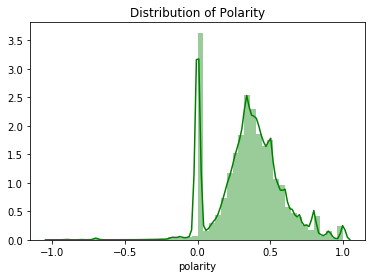

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(res, color = 'g')
plt.title('Distribution of Polarity')
plt.xlabel('polarity')

In [14]:
res2 = reviews_non_na.apply(lambda x: TextBlob(x).sentiment[1]) 

Text(0.5, 0, 'Subjectivity')

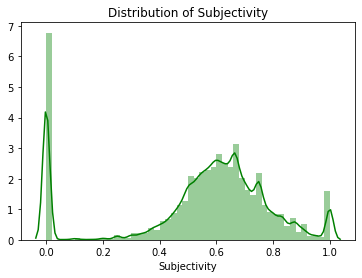

In [15]:
sns.distplot(res2, color = 'g')
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')

In [16]:
text = ''
for i in reviews_non_na[0:10000]:
    text = i + text

(-0.5, 399.5, 199.5, -0.5)

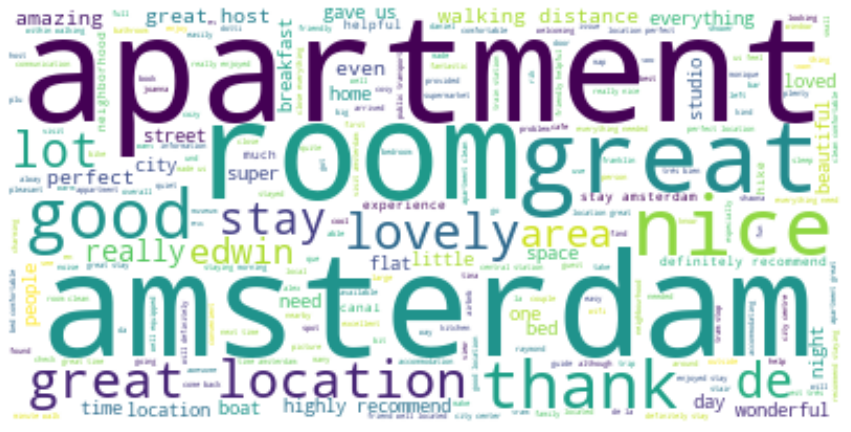

In [17]:
import re
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sns
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.add("said")
text = re.sub("San Diego", "", text)
text = re.sub("san diego", "", text)
text = re.sub("place", "", text)
text = re.sub("house", "", text)
wc = WordCloud(background_color="white", max_words=5000, #mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# show
plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")


In [18]:
len(reviews)

493815

In [19]:
import numpy as np
import pandas as pd
import gzip
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD

from textblob import TextBlob


import string
import re
from nltk.stem.porter import PorterStemmer


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [23]:
#listings = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-diego/2019-11-21/data/listings.csv.gz", compression='gzip',
#                     low_memory=False)
listings = pd.read_csv("listings.csv")

/Users/sylvia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (43,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 0, 'review scores')

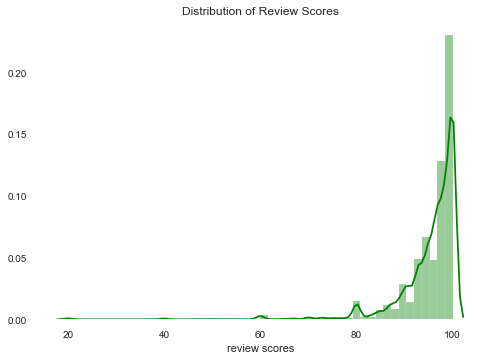

In [24]:
fig = sns.distplot(listings["review_scores_rating"][listings["review_scores_rating"].notnull()], color = 'g')
plt.title("Distribution of Review Scores")
plt.xlabel("review scores")
